In [ ]:
import tensorflow as tf

In [ ]:
!wget -c https://labs.criteo.com/wp-content/uploads/2015/04/dac_sample.tar.gz -O - | tar -xz

--2023-04-12 16:05:49--  https://labs.criteo.com/wp-content/uploads/2015/04/dac_sample.tar.gz
Resolving labs.criteo.com (labs.criteo.com)... 87.98.154.146
Connecting to labs.criteo.com (labs.criteo.com)|87.98.154.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8787154 (8.4M) [application/x-gzip]
Saving to: ‘STDOUT’

-                     1%[                    ]  94.55K   353KB/s               tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
-                   100%[===================>]   8.38M  9.10MB/s    in 0.9s    

2023-04-12 16:05:51 (9.10 MB/s) - written to stdout [8787154/8787154]

tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHIL

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from keras.optimizers import sgd, Nadam
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop,adam
from keras.regularizers import l2


In [ ]:
data = pd.read_csv("/content/Crop_recommendation.xls")
data.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

In [ ]:
data.tail(10)

N   P   K  temperature   humidity        ph    rainfall   label
2190  103  40  30    27.309018  55.196224  6.348316  141.483164  coffee
2191  118  31  34    27.548230  62.881792  6.123796  181.417081  coffee
2192  106  21  35    25.627355  57.041511  7.428524  188.550654  coffee
2193  116  38  34    23.292503  50.045570  6.020947  183.468585  coffee
2194   97  35  26    24.914610  53.741447  6.334610  166.254931  coffee
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [ ]:
data.shape

(2200, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#lets describe the data
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
data.count()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

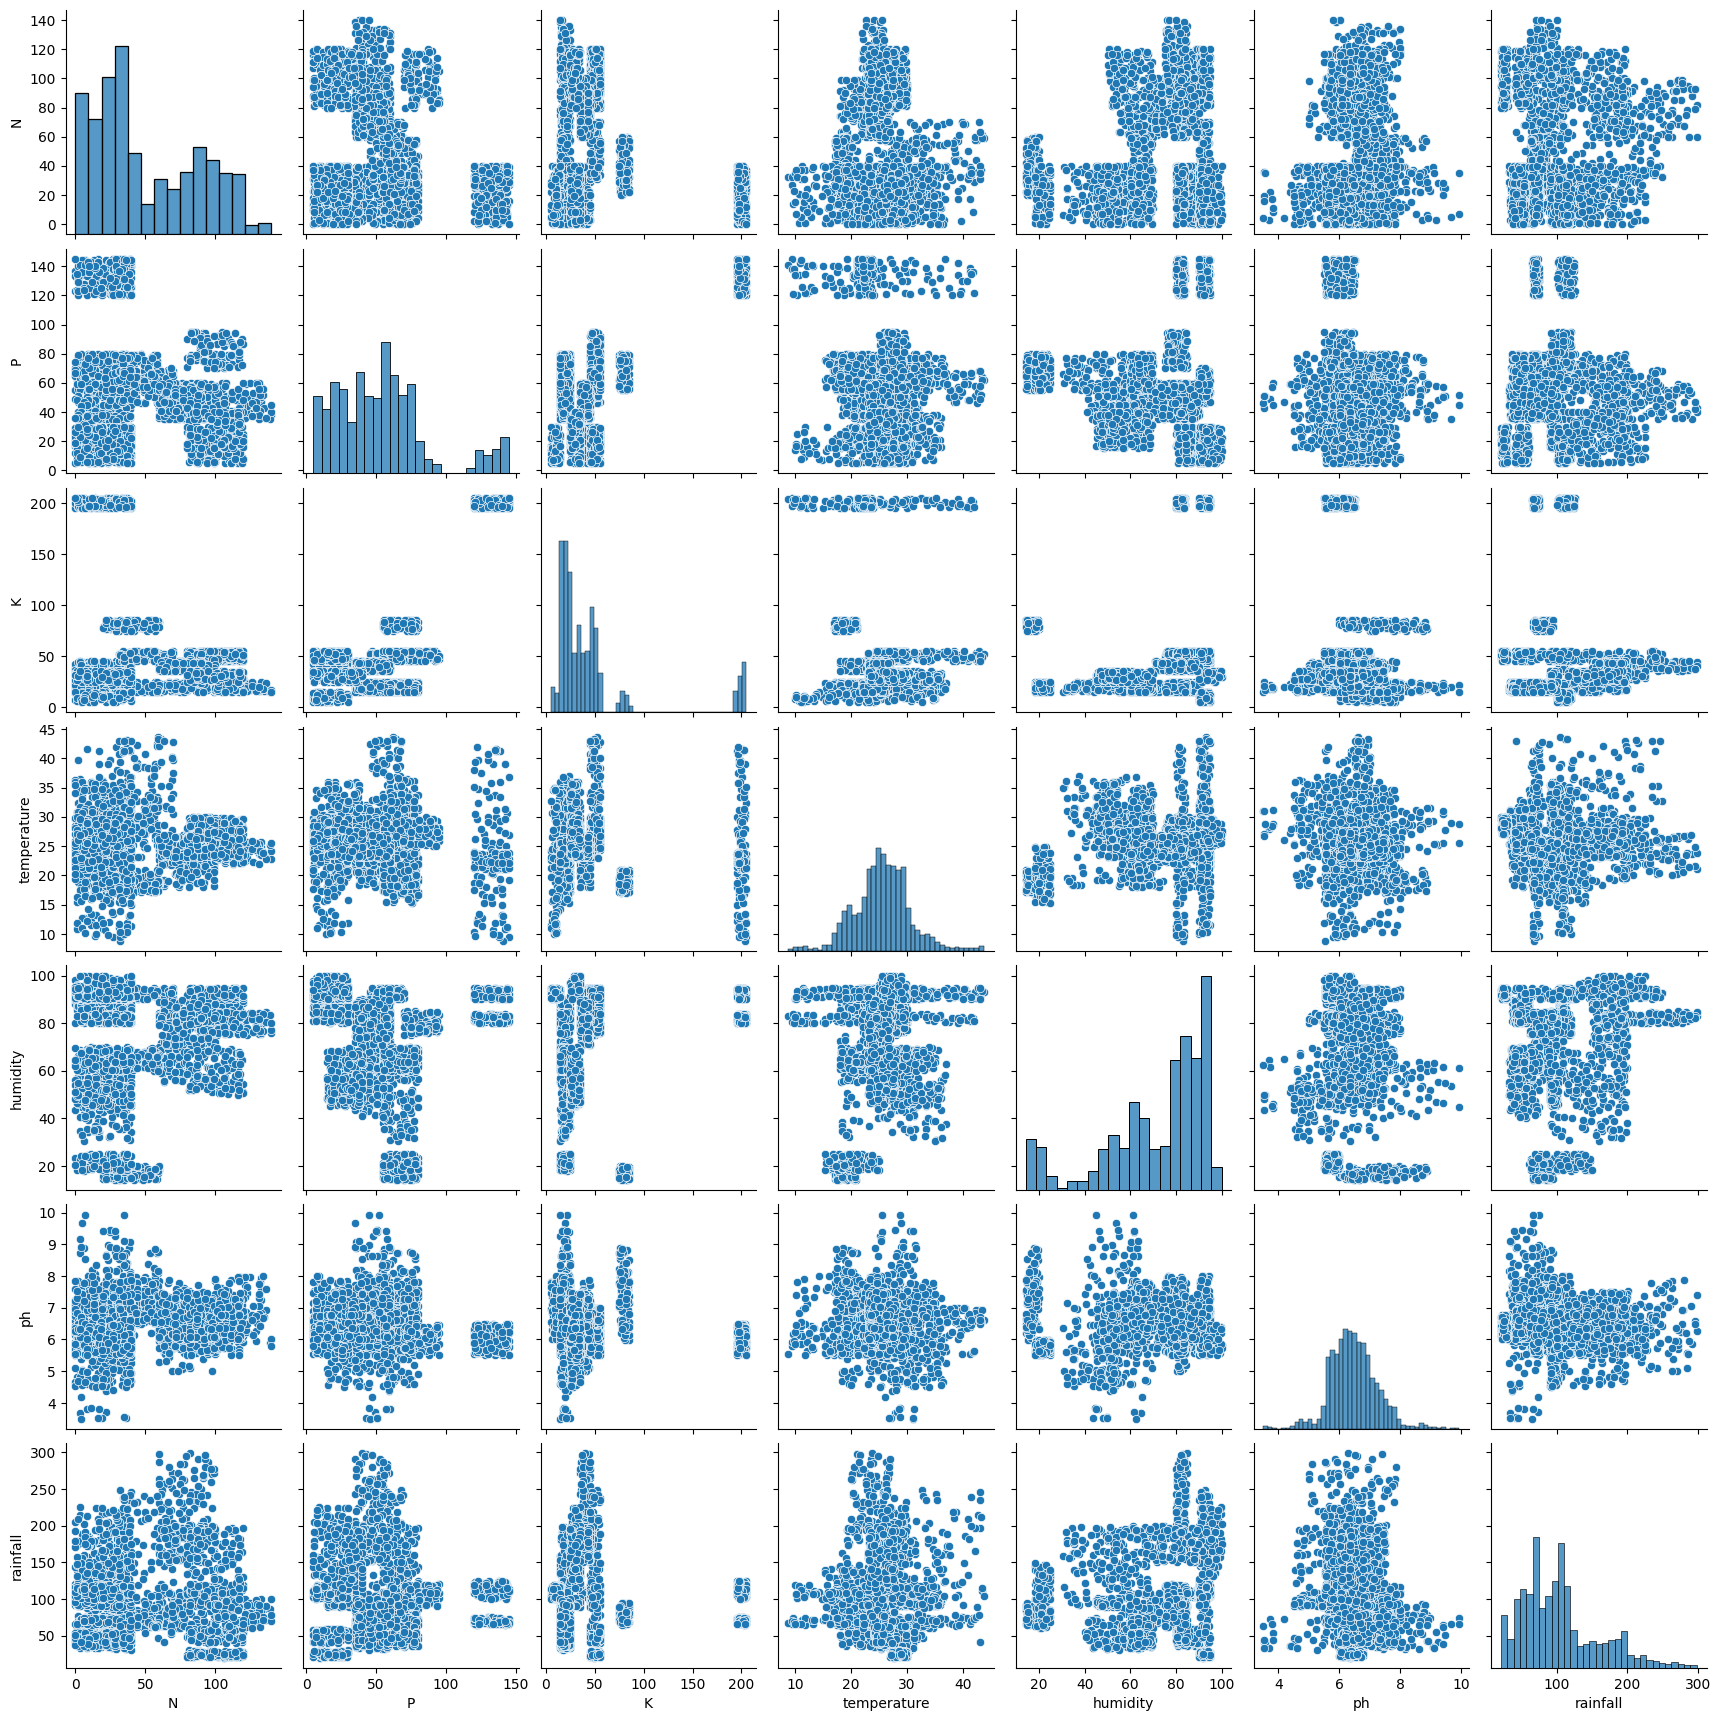

In [ ]:
sns.pairplot(data)

In [ ]:
count = data.label.unique().size

In [ ]:
print(count)

22


In [ ]:
print(data["label"].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['label']= label_encoder.fit_transform(data['label'])
  
data['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
data.head(2)

N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20

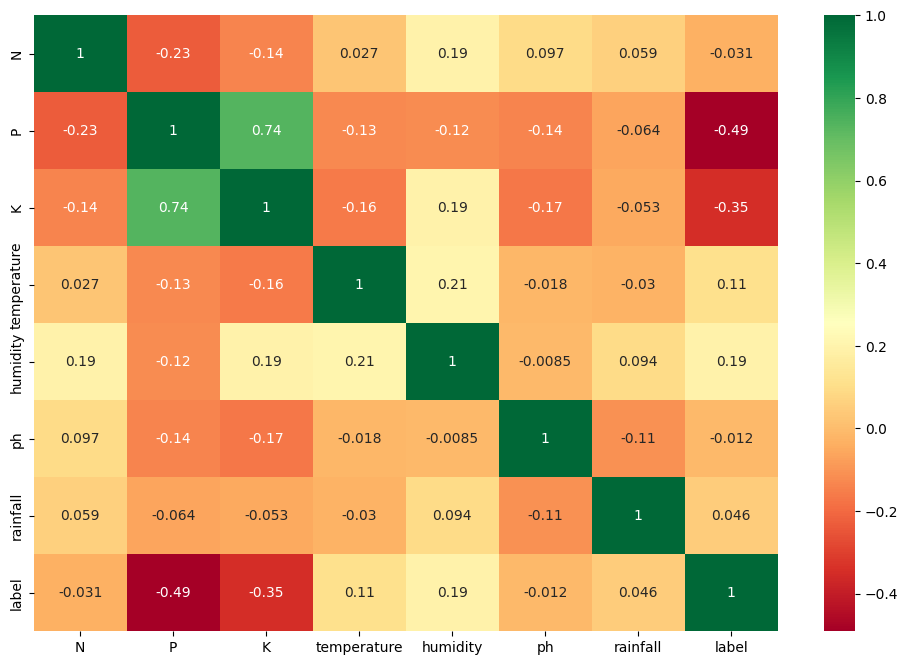

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: >

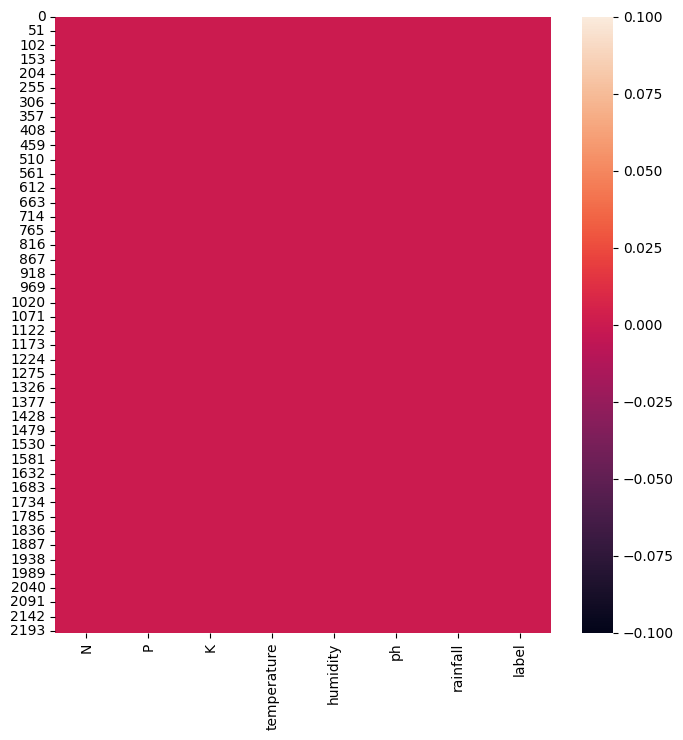

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [ ]:
# creating a for to replace outlayers using boxplot method
num_var=(data)
for i in num_var:
    # taking quantiles
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1 # calculating IQR
    data[i] = np.where(data[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),data[i]) # removing outlayers
    data[i] = np.where(data[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),data[i]) # removing outlayers

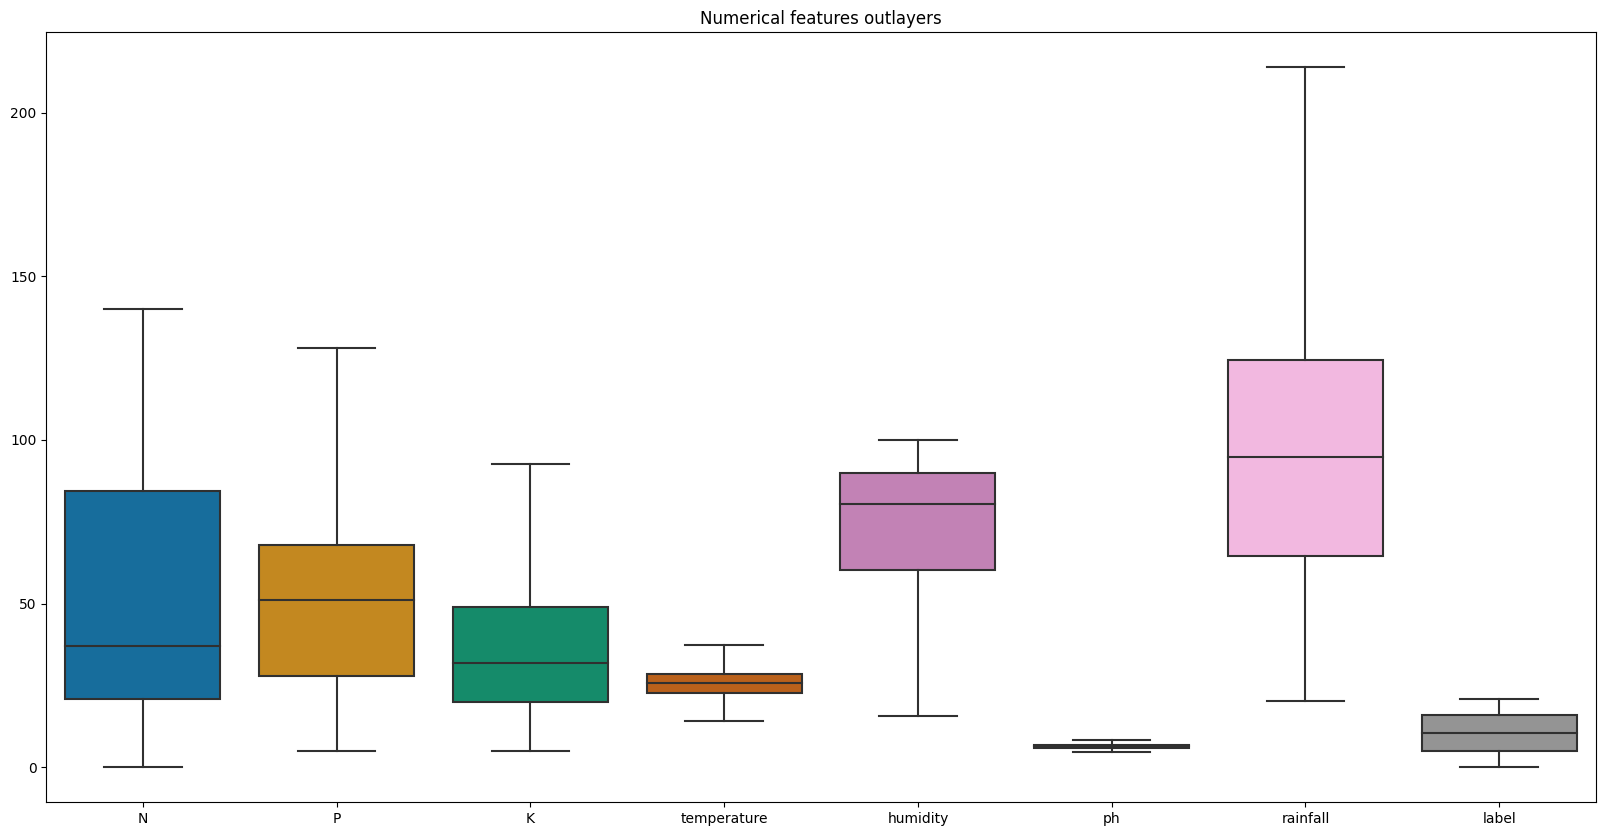

In [ ]:
# Plotting boxplots to numeric features
num_var = ['N', 	'P', 	'K', 	'temperature', 	'humidity', 	'ph', 	'rainfall','label']


plt.figure(figsize=(20,10))
sns.boxplot(data=data[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

In [ ]:
# Extract the input features and target variable
X = data.drop(columns=['label']).values
y= data['label'].values

In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(1)
])
label_encoder = preprocessing.LabelEncoder()
data['label']= label_encoder.fit_transform(data['label'])
  
data['label'].unique()




array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Define the hyperparameters to tune
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.01, 0.1]
optimizers = [Adam, RMSprop, Nadam]
loss_functions = ['mean_squared_error', 'mean_absolute_error', 'binary_crossentropy']

In [ ]:
# Perform grid search for hyperparameter tuning
best_loss = float('inf')
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for optimizer in optimizers:
            for loss_function in loss_functions:
                print(f"Training model with batch size {batch_size}, learning rate {learning_rate}, optimizer {optimizer}, and loss function {loss_function}")
                model.compile(loss=loss_function, optimizer=optimizer(lr=learning_rate), metrics=['accuracy'])
                #history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, validation_data=(X_test, y_test))
                history = model.fit(X, Y, epochs=200, batch_size=32,validation_data=(X, y))
                val_loss = history.history['val_loss'][-1]
                if val_loss < best_loss:
                    best_loss = val_loss
                    best_params = {
                        'batch_size': batch_size,
                        'learning_rate': learning_rate,
                        'optimizer': optimizer,
                        'loss_function': loss_function
                    }
print("Best hyperparameters:", best_params)

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5174 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5051 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5001 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5001 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accura

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200


Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: -4536.6392 - accuracy: 0.0455 - val_loss: -10233.4707 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -26805.8242 - accuracy: 0.0455 - val_loss: -52687.4258 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: -103157.3203 - accuracy: 0.0455 - val_loss: -172485.8281 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -277021.8125 - accuracy: 0.0455 - val_loss: -412468.5938 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: -596117.6875 - accuracy: 0.0455 - val_loss: -817831.7500 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: -1103242.1250 - accuracy:

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 13ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 12ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: -17276987392.0000 - accuracy: 0.0455 - val_loss: -17438298112.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -17398460416.0000 - accuracy: 0.0455 - val_loss: -17633761280.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -17821032448.0000 - accuracy: 0.0455 - val_loss: -17831196672.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -17863856128.0000 - accuracy: 0.0455 - val_loss: -18030817280.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -18205196288.0000 - accuracy: 0.0455 - val_loss: -18230933504.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==================

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 3s 14ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_acc

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 3s 8ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/20

Training model with batch size 16, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: -92175663104.0000 - accuracy: 0.0455 - val_loss: -92871385088.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -92670484480.0000 - accuracy: 0.0455 - val_loss: -93470228480.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -93533028352.0000 - accuracy: 0.0455 - val_loss: -94070775808.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -94298431488.0000 - accuracy: 0.0455 - val_loss: -94681317376.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -94995185664.0000 - accuracy: 0.0455 - val_loss: -95291752448.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [======================


Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 7/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_a

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200
6

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: -282224590848.0000 - accuracy: 0.0455 - val_loss: -281643679744.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -282301530112.0000 - accuracy: 0.0455 - val_loss: -282888667136.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 7ms/step - loss: -281417252864.0000 - accuracy: 0.0455 - val_loss: -284135096320.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 1s 9ms/step - loss: -286286184448.0000 - accuracy: 0.0455 - val_loss: -285400006656.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 1s 9ms/step - loss: -286074699776.0000 - accuracy: 0.0455 - val_loss: -286670651392.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [===============

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_a

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -631771168768.0000 - accuracy: 0.0455 - val_loss: -626670108672.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -628643266560.0000 - accuracy: 0.0455 - val_loss: -628805795840.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: -628518420480.0000 - accuracy: 0.0455 - val_loss: -630932045824.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -630777511936.0000 - accuracy: 0.0455 - val_loss: -633082019840.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -638625906688.0000 - accuracy: 0.0455 - val_loss: -635234418688.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [=========

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accur

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200

Training model with batch size 16, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: -1152146997248.0000 - accuracy: 0.0455 - val_loss: -1155186294784.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -1159997423616.0000 - accuracy: 0.0455 - val_loss: -1158384844800.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -1164090146816.0000 - accuracy: 0.0455 - val_loss: -1161614196736.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -1160868659200.0000 - accuracy: 0.0455 - val_loss: -1164842106880.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 1s 10ms/step - loss: -1159774994432.0000 - accuracy: 0.0455 - val_loss: -1168059138048.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 1s 10ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 1s 9ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accurac

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200
69

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -1934256766976.0000 - accuracy: 0.0455 - val_loss: -1939833880576.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -1946120880128.0000 - accuracy: 0.0455 - val_loss: -1944373821440.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -1941448949760.0000 - accuracy: 0.0455 - val_loss: -1948927393792.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: -1947823374336.0000 - accuracy: 0.0455 - val_loss: -1953441251328.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -1952329498624.0000 - accuracy: 0.0455 - val_loss: -1957991284736.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [======

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_ac

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -3022387675136.0000 - accuracy: 0.0455 - val_loss: -3014112575488.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 7ms/step - loss: -3035067318272.0000 - accuracy: 0.0455 - val_loss: -3020158664704.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -3029036433408.0000 - accuracy: 0.0455 - val_loss: -3026260852736.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: -3006239080448.0000 - accuracy: 0.0455 - val_loss: -3032318738432.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -3039209979904.0000 - accuracy: 0.0455 - val_loss: -3038421975040.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accura

Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200


Training model with batch size 16, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: -4380422569984.0000 - accuracy: 0.0455 - val_loss: -4394589093888.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -4394061398016.0000 - accuracy: 0.0455 - val_loss: -4402454724608.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -4441702924288.0000 - accuracy: 0.0455 - val_loss: -4410331627520.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: -4420403200000.0000 - accuracy: 0.0455 - val_loss: -4418159247360.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -4424734867456.0000 - accuracy: 0.0455 - val_loss: -4426015703040.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [====

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accura

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200


Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 12ms/step - loss: -6192540155904.0000 - accuracy: 0.0455 - val_loss: -6173265756160.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 7ms/step - loss: -6176985579520.0000 - accuracy: 0.0455 - val_loss: -6183032717312.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 1s 9ms/step - loss: -6172832169984.0000 - accuracy: 0.0455 - val_loss: -6192804921344.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: -6170923237376.0000 - accuracy: 0.0455 - val_loss: -6202585513984.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -6154439622656.0000 - accuracy: 0.0455 - val_loss: -6212391272448.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [===

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: -8372639760384.0000 - accuracy: 0.0455 - val_loss: -8375044669440.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -8400236707840.0000 - accuracy: 0.0455 - val_loss: -8386974842880.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -8383132860416.0000 - accuracy: 0.0455 - val_loss: -8398913929216.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: -8392674377728.0000 - accuracy: 0.0455 - val_loss: -8411013971968.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -8454131417088.0000 - accuracy: 0.0455 - val_loss: -8423027507200.0000 - val_accuracy: 0.0455
Epoch 6/200
69/69

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accu

Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 8/200
6

Training model with batch size 32, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: -11074031058944.0000 - accuracy: 0.0455 - val_loss: -11003409465344.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -11006451384320.0000 - accuracy: 0.0455 - val_loss: -11017697361920.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -11000199774208.0000 - accuracy: 0.0455 - val_loss: -11032068096000.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: -11031486136320.0000 - accuracy: 0.0455 - val_loss: -11046472384512.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -11115001020416.0000 - accuracy: 0.0455 - val_loss: -11060887158784.0000 - val_accuracy: 0.0455
Epoch 6/200

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accurac

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 10ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200


Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: -14124879708160.0000 - accuracy: 0.0455 - val_loss: -14171435433984.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -14118168821760.0000 - accuracy: 0.0455 - val_loss: -14188487376896.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -14191890006016.0000 - accuracy: 0.0455 - val_loss: -14205540368384.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -14176167657472.0000 - accuracy: 0.0455 - val_loss: -14222630060032.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -14301070884864.0000 - accuracy: 0.0455 - val_loss: -14239889620992.0000 - val_accuracy: 0.0455
Epoch 6/200
69

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_a

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: -17863865794560.0000 - accuracy: 0.0455 - val_loss: -17896031911936.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -17874068439040.0000 - accuracy: 0.0455 - val_loss: -17915799666688.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: -17828648321024.0000 - accuracy: 0.0455 - val_loss: -17935737290752.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -17893838290944.0000 - accuracy: 0.0455 - val_loss: -17955668623360.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -17971357417472.0000 - accuracy: 0.0455 - val_loss: -17975394435072.0000 - val_accuracy: 0.0455
Epoch 6/

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accur

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200

Training model with batch size 32, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: -22116361568256.0000 - accuracy: 0.0455 - val_loss: -22168163319808.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -22057473540096.0000 - accuracy: 0.0455 - val_loss: -22191083094016.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -22281250144256.0000 - accuracy: 0.0455 - val_loss: -22214179028992.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -22392984305664.0000 - accuracy: 0.0455 - val_loss: -22237226729472.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -22126092353536.0000 - accuracy: 0.0455 - val_loss: -22260314275840.0000 - val_accuracy: 0.0455
Epoch 6/200


Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200
69

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: -27095371612160.0000 - accuracy: 0.0455 - val_loss: -27123014172672.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -27208592654336.0000 - accuracy: 0.0455 - val_loss: -27149442482176.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: -27175946289152.0000 - accuracy: 0.0455 - val_loss: -27175375863808.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -27218728189952.0000 - accuracy: 0.0455 - val_loss: -27201772716032.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: -27287038722048.0000 - accuracy: 0.0455 - val_loss: -27228125528064.0000 - val_accuracy: 0.0455
Epoch 6/200
69/

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 9ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_ac

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -32704439517184.0000 - accuracy: 0.0455 - val_loss: -32763600175104.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: -32763325448192.0000 - accuracy: 0.0455 - val_loss: -32793474105344.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: -32996214177792.0000 - accuracy: 0.0455 - val_loss: -32823115251712.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: -32810106617856.0000 - accuracy: 0.0455 - val_loss: -32853043707904.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: -32631618011136.0000 - accuracy: 0.0455 - val_loss: -32882835849216.0000 - val_accuracy: 0.0455
Epoch 6/2

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accura

Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200


Training model with batch size 32, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: -38969676922880.0000 - accuracy: 0.0455 - val_loss: -39072865189888.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -39028988575744.0000 - accuracy: 0.0455 - val_loss: -39106381873152.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -38992095477760.0000 - accuracy: 0.0455 - val_loss: -39139974053888.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: -39187248054272.0000 - accuracy: 0.0455 - val_loss: -39173545263104.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: -39327388139520.0000 - accuracy: 0.0455 - val_loss: -39207124860928.0000 - val_accuracy: 0.0455
Epoch 6/200
6

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accura

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200


Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -46336187564032.0000 - accuracy: 0.0455 - val_loss: -46208546504704.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -46237772414976.0000 - accuracy: 0.0455 - val_loss: -46245942919168.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -46251802361856.0000 - accuracy: 0.0455 - val_loss: -46283175755776.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -46287474917376.0000 - accuracy: 0.0455 - val_loss: -46320962240512.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -46199805575168.0000 - accuracy: 0.0455 - val_loss: -46358094413824.0000 - val_accuracy: 0.0455
Epoch 6/200
6

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -54148787601408.0000 - accuracy: 0.0455 - val_loss: -54163186647040.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -54214101303296.0000 - accuracy: 0.0455 - val_loss: -54204903194624.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: -54074661666816.0000 - accuracy: 0.0455 - val_loss: -54246212894720.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: -54247081115648.0000 - accuracy: 0.0455 - val_loss: -54287904276480.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -53900665159680.0000 - accuracy: 0.0455 - val_loss: -54329390137344.0000 - val_accuracy: 0.0455
Epoch 6

Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 7/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_ac

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/20

Training model with batch size 64, learning rate 0.001, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 9ms/step - loss: -62819584180224.0000 - accuracy: 0.0455 - val_loss: -62903583506432.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -62903684169728.0000 - accuracy: 0.0455 - val_loss: -62949775376384.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 7ms/step - loss: -62923535810560.0000 - accuracy: 0.0455 - val_loss: -62995841417216.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: -63238662258688.0000 - accuracy: 0.0455 - val_loss: -63041852932096.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -63410054103040.0000 - accuracy: 0.0455 - val_loss: -63088220962816.0000 - val_accuracy: 0.0455
Epoch 6/200

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accurac

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 1s 9ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 1s 9ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 1s 9ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 1s 9ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200
6

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 9ms/step - loss: -72970269622272.0000 - accuracy: 0.0455 - val_loss: -72609198768128.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -72644103766016.0000 - accuracy: 0.0455 - val_loss: -72659563970560.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -73068659605504.0000 - accuracy: 0.0455 - val_loss: -72710004670464.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -72468521811968.0000 - accuracy: 0.0455 - val_loss: -72760487313408.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -72569931694080.0000 - accuracy: 0.0455 - val_loss: -72810735075328.0000 - val_accuracy: 0.0455
Epoch 6/200
69

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 1s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_a

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -83288181964800.0000 - accuracy: 0.0455 - val_loss: -83271916453888.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -83576238374912.0000 - accuracy: 0.0455 - val_loss: -83327214157824.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -83011701833728.0000 - accuracy: 0.0455 - val_loss: -83382738354176.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -83752239759360.0000 - accuracy: 0.0455 - val_loss: -83438312882176.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -83485691740160.0000 - accuracy: 0.0455 - val_loss: -83494055182336.0000 - val_accuracy: 0.0455
Epoch 6/

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accur

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200

Training model with batch size 64, learning rate 0.01, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 3s 9ms/step - loss: -94817358970880.0000 - accuracy: 0.0455 - val_loss: -94855845904384.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -95189360181248.0000 - accuracy: 0.0455 - val_loss: -94916688478208.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 7ms/step - loss: -94991657467904.0000 - accuracy: 0.0455 - val_loss: -94976742522880.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 7ms/step - loss: -94348075073536.0000 - accuracy: 0.0455 - val_loss: -95036905619456.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -95327512166400.0000 - accuracy: 0.0455 - val_loss: -95098050183168.0000 - val_accuracy: 0.0455
Epoch 6/200


Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 7ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200
69

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.adam.Adam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 7ms/step - loss: -107820968050688.0000 - accuracy: 0.0455 - val_loss: -107571071418368.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: -107454260051968.0000 - accuracy: 0.0455 - val_loss: -107637098151936.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -107648137560064.0000 - accuracy: 0.0455 - val_loss: -107702890004480.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -107891650461696.0000 - accuracy: 0.0455 - val_loss: -107768874795008.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -108125357080576.0000 - accuracy: 0.0455 - val_loss: -107835086077952.0000 - val_accuracy: 0.0455
Epoch

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_ac

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.rmsprop.RMSprop'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 1s 6ms/step - loss: -120858441940992.0000 - accuracy: 0.0455 - val_loss: -121396663418880.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 4ms/step - loss: -121432432443392.0000 - accuracy: 0.0455 - val_loss: -121468243410944.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: -121701010505728.0000 - accuracy: 0.0455 - val_loss: -121539538190336.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: -121758162092032.0000 - accuracy: 0.0455 - val_loss: -121611780882432.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: -121678361264128.0000 - accuracy: 0.0455 - val_loss: -121683461537792.0000 - val_accuracy: 0.0455

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_squared_error
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 130.5000 - accuracy: 0.0455 - val_loss: 130.5000 - val_accura

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function mean_absolute_error
Epoch 1/200
69/69 [==============================] - 2s 10ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 1s 9ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 5ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 6/200
69/69 [==============================] - 0s 6ms/step - loss: 9.5909 - accuracy: 0.0455 - val_loss: 9.5909 - val_accuracy: 0.0455
Epoch 7/200

Training model with batch size 64, learning rate 0.1, optimizer <class 'keras.optimizers.nadam.Nadam'>, and loss function binary_crossentropy
Epoch 1/200
69/69 [==============================] - 2s 8ms/step - loss: -136879357820928.0000 - accuracy: 0.0455 - val_loss: -136268474220544.0000 - val_accuracy: 0.0455
Epoch 2/200
69/69 [==============================] - 0s 6ms/step - loss: -135802696761344.0000 - accuracy: 0.0455 - val_loss: -136345221595136.0000 - val_accuracy: 0.0455
Epoch 3/200
69/69 [==============================] - 0s 6ms/step - loss: -136554156654592.0000 - accuracy: 0.0455 - val_loss: -136422656835584.0000 - val_accuracy: 0.0455
Epoch 4/200
69/69 [==============================] - 0s 6ms/step - loss: -136081576034304.0000 - accuracy: 0.0455 - val_loss: -136500243070976.0000 - val_accuracy: 0.0455
Epoch 5/200
69/69 [==============================] - 0s 6ms/step - loss: -137622789816320.0000 - accuracy: 0.0455 - val_loss: -136578777219072.0000 - val_accuracy: 0.0455
Epo

In [ ]:

optimizer = RMSprop(lr=0.001)
#optimizer = adam(lr=0.001)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.compile(loss='mean_squared_error', optimizer='Nadam',metrics=['accuracy'])
history = model.fit(X, Y, epochs=200, batch_size=32,validation_data=(X, y))
#history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_val y_val), verbose=2)

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


69/69 [==============================] - 1s 6ms/step - loss: 3.4322 - accuracy: 0.0609 - val_loss: 3.0522 - val_accuracy: 0.0636
Epoch 2/200
69/69 [==============================] - 0s 5ms/step - loss: 3.3019 - accuracy: 0.0623 - val_loss: 3.5952 - val_accuracy: 0.0591
Epoch 3/200
69/69 [==============================] - 0s 4ms/step - loss: 3.2343 - accuracy: 0.0632 - val_loss: 3.0938 - val_accuracy: 0.0532
Epoch 4/200
69/69 [==============================] - 0s 5ms/step - loss: 3.3200 - accuracy: 0.0609 - val_loss: 3.1198 - val_accuracy: 0.0682
Epoch 5/200
69/69 [==============================] - 0s 4ms/step - loss: 3.2662 - accuracy: 0.0595 - val_loss: 3.4801 - val_accuracy: 0.0691
Epoch 6/200
69/69 [==============================] - 0s 5ms/step - loss: 3.3777 - accuracy: 0.0677 - val_loss: 3.1522 - val_accuracy: 0.0659
Epoch 7/200
69/69 [==============================] - 0s 5ms/step - loss: 3.2757 - accuracy: 0.0582 - val_loss: 3.6025 - val_accuracy: 0.0523
Epoch 8/200
69/69 [======

In [ ]:

# Extract the input features and target variable
X_test = data.drop(columns=['label']).values
Y_test = data['label'].values

# Evaluate the model on the test data
loss = model.evaluate(X_test, Y_test)
print('Test loss:', loss)

69/69 [==============================] - 0s 2ms/step - loss: 2.9838 - accuracy: 0.0709
Test loss: [2.9837772846221924, 0.07090909034013748]


In [ ]:
# Evaluate the model
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.8426265716552734
Test accuracy: 0.07045454531908035


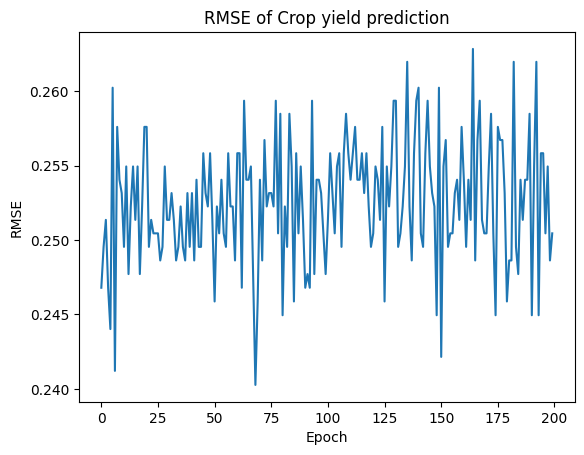

In [ ]:
rmse = np.sqrt(history .history ['accuracy'])
# Plot the RMSE values
plt.plot(rmse)
plt.title('RMSE of Crop yield prediction')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

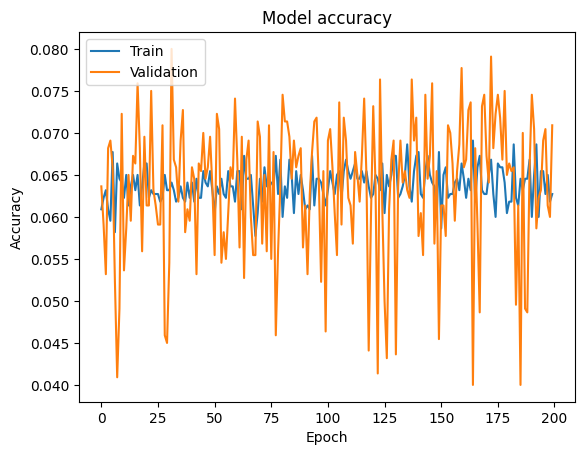

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()